# Preprocesamiento de datos

## Importación de librerias

In [260]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

## Configuración visual

In [261]:
#Configuración visual
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

## Carga de archivos

In [262]:
#Subimos el archivo csv a un dataframe
df = pd.read_csv("marketingcampaigns.csv", sep=',', quoting=1, on_bad_lines='skip')

In [263]:
#Leemos el archivo y comprobamos que se haya subido correctamente
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


## PREPROCESAMIENTO DE DATOS

### Información del dataset

In [264]:
df.shape #dimensiones del dataframe

(1032, 10)

In [265]:
df.info() #informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [266]:
df.columns #columnas del dataframe

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [267]:
df.duplicated().sum() # Comprobamos si hay filas duplicadas en el dataframe

np.int64(15)

In [268]:
df = df.drop_duplicates() #Eliminamos datos duplicados

In [269]:
df.describe() #estadisticas del dataframe

,roi,conversion_rate,revenue
count,1013.000000,1013.000000,1014.000000
mean,0.535084,0.543376,513344.391292
std,0.262657,0.267734,287623.398940
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,268474.472500
50%,0.530000,0.550000,519906.220000
75%,0.770000,0.770000,770016.185000
max,0.990000,1.500000,999712.490000


In [270]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [271]:
df.isnull().sum() / len(df) * 100 #comprobamos el porcentaje de valores nulos en el dataframe

campaign_name      0.000000
start_date         0.098328
end_date           0.196657
budget             0.294985
roi                0.393314
type               0.098328
target_audience    0.196657
channel            0.098328
conversion_rate    0.393314
revenue            0.294985
dtype: float64

<Axes: >

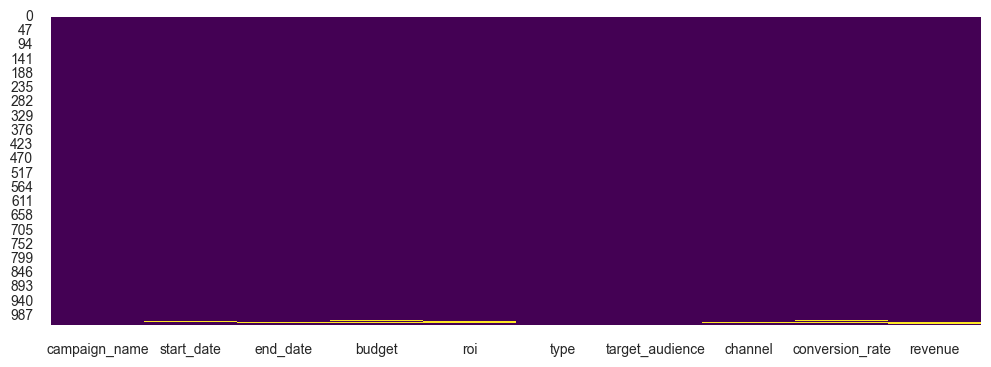

In [272]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualizamos los valores nulos en el dataframe

### Limpieza y reparación de datos

##### Columna "end_date"

In [273]:
#Remplazamos los datos nulos de la columna end_date por "sin datos"
df['end_date'] = df['end_date'].fillna('sin datos')

##### Columna "budget"

In [274]:
# Convertimos la columna 'budget' a numérica, forzando errores a NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
# Calculamos la mediana ignorando NaN
mediana_budget = df['budget'].median()
# Reemplazamos los valores nulos por la mediana
df['budget'] = df['budget'].fillna(mediana_budget)

##### Columna "roi"

In [275]:
# Calculamos la mediana de la columna 'roi' ignorando NaN
mediana_roi = df['roi'].median()
# Reemplazamos los valores nulos por la mediana
df['roi'] = df['roi'].fillna(mediana_roi)

##### Columna "type"

In [276]:
#Remplazamos los datos nulos de la columna type por "sin datos"
df['type'] = df['type'].fillna('sin datos')

##### Columna "target_audience"

In [277]:
# Reemplazamos los datos nulos de la columna 'target_audience' por "sin datos"
df['target_audience'] = df['target_audience'].fillna('sin datos')

##### Columna "channel"

In [278]:
# Reemplazamos los datos nulos de la columna 'channel' por "sin datos"
df['channel'] = df['channel'].fillna('sin datos')

##### Columna "conversion_rate"

In [279]:
# Calculamos la mediana de la columna 'conversion_rate' ignorando NaN
mediana_conversion_rate = df['conversion_rate'].median()
# Reemplazamos los valores nulos por la mediana
df['conversion_rate'] = df['conversion_rate'].fillna(mediana_conversion_rate)

##### Columna "revenue"

In [280]:
# Calculamos la mediana de la columna 'revenue' ignorando NaN
mediana_revenue = df['revenue'].median()
# Reemplazamos los valores nulos por la mediana
df['revenue'] = df['revenue'].fillna(mediana_revenue)

In [281]:
df.isnull().sum() / len(df) * 100 #comprobamos el porcentaje de valores nulos en el dataframe

campaign_name      0.000000
start_date         0.098328
end_date           0.000000
budget             0.000000
roi                0.000000
type               0.000000
target_audience    0.000000
channel            0.000000
conversion_rate    0.000000
revenue            0.000000
dtype: float64

##### Renombramos columnas

In [282]:
df.rename(columns={'campaign_name': 'nombre campaña'}, inplace=True) #renombramos la columna "campaing_name"
df.rename(columns={'start_date': 'fecha inicio'}, inplace=True) #renombramos la columna "start_date"
df.rename(columns={'end_date': 'fecha fin'}, inplace=True) #renombramos la columna "end_date"
df.rename(columns={'budget': 'inversión'}, inplace=True) #renombramos la columna "budget"
df.rename(columns={'roi': 'retorno inversión'}, inplace=True) #renombramos la columna "roi"
df.rename(columns={'type': 'tipo'}, inplace=True) #renombramos la columna "type"
df.rename(columns={'target_audience': 'audiencia target'}, inplace=True) #renombramos la columna "target_audience"
df.rename(columns={'channel': 'canal'}, inplace=True) #renombramos la columna "channel"
df.rename(columns={'conversion_rate': 'ratio conversión'}, inplace=True) #renombramos la columna "conversion_rate"
df.rename(columns={'revenue': 'facturación'}, inplace=True) #renombramos la columna "revenue"

##### Reparación de fechas

In [283]:
# Identificamos y corregimos fechas mal escritas en 'fecha inicio' y 'fecha fin'
# Si hay fechas como strings no convertidas, intentamos forzar su conversión

# Reconvertimos a datetime forzando errores a NaT
df['fecha inicio'] = pd.to_datetime(df['fecha inicio'], errors='coerce')
df['fecha fin'] = pd.to_datetime(df['fecha fin'], errors='coerce')

# Mostramos cuántos valores siguen siendo NaT tras la conversión
print("Fechas no válidas en 'fecha inicio':", df['fecha inicio'].isna().sum())
print("Fechas no válidas en 'fecha fin':", df['fecha fin'].isna().sum())

Fechas no válidas en 'fecha inicio': 3
Fechas no válidas en 'fecha fin': 3


##### Valores extraños

##### Reparación de valores en columnas Revenue y Budget

In [284]:
# Eliminamos las filas donde la columna 'inversión' tenga valores negativos
df = df[df['inversión'] >= 0].copy()

In [285]:
valores_negativos = (df['inversión'] < 0).sum()
print(f"Número de valores negativos en 'inversión': {valores_negativos}")

Número de valores negativos en 'inversión': 0


In [286]:
# No eliminamos los outliers de momento. Veremos como se comportan en el análisis EDA y decidiremos.

##### Conversión de valores numéricos

In [287]:
# Función para convertir valores numéricos a formato con separador de miles y decimales con coma
def formato_espanol(valor):
    try:
        valor_float = float(valor)
        return f"{valor_float:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    except:
        return valor

# Aplicamos el formato a las columnas numéricas existentes
columnas_numericas = ['inversión', 'retorno inversión', 'ratio conversión', 'facturación']
for col in columnas_numericas:
    df[col] = df[col].apply(formato_espanol)

##### Reparación de decimales en columnas Roi y conversion rate

In [288]:
# Convertimos los valores numéricos de las columnas 'facturación' e 'inversión' a formato "claro"
def formato_claro(valor):
    try:
        valor_float = float(str(valor).replace('.', '').replace(',', '.'))
        return f"{valor_float:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    except:
        return valor

df['facturación'] = df['facturación'].apply(formato_claro)
df['inversión'] = df['inversión'].apply(formato_claro)

##### Corrección de palabras mal escritas

##### Columna channel

In [289]:
# Buscamos posibles errores de escritura en los valores de la columna 'canal'
print("Valores únicos en 'canal':")
print(df['canal'].unique())

# También mostramos el recuento de cada valor para detectar posibles errores frecuentes
print("\nRecuento de valores en 'canal':")
print(df['canal'].value_counts(dropna=False))

Valores únicos en 'canal':
['organic' 'promotion' 'paid' 'referral' 'sin datos']

Recuento de valores en 'canal':
canal
promotion    276
referral     253
organic      245
paid         241
sin datos      1
Name: count, dtype: int64


##### Columna target

In [290]:
# Buscamos posibles errores de escritura en los valores de la columna 'audiencia target'
print("Valores únicos en 'audiencia target':")
print(df['audiencia target'].unique())

# También mostramos el recuento de cada valor para detectar posibles errores frecuentes
print("\nRecuento de valores en 'audiencia target':")
print(df['audiencia target'].value_counts(dropna=False))

Valores únicos en 'audiencia target':
['B2B' 'B2C' 'social media' 'sin datos']

Recuento de valores en 'audiencia target':
audiencia target
B2B             520
B2C             493
sin datos         2
social media      1
Name: count, dtype: int64


### Nuevos datos

##### Añadimos nueva columna para la duración de las campañas

In [291]:
# Nos aseguramos de que las columnas de fecha sean tipo datetime
df['fecha inicio'] = pd.to_datetime(df['fecha inicio'], errors='coerce')
df['fecha fin'] = pd.to_datetime(df['fecha fin'], errors='coerce')

# Calculamos la duración en días a partir de fecha inicio y fecha fin
df['duración días'] = (df['fecha fin'] - df['fecha inicio']).dt.days

# Si alguna fila tiene fechas no válidas o faltantes, el resultado será NaN
df['duración días'] = df['duración días'].fillna('sin datos')

In [292]:
df['duración días'].describe()

count     1016.0
unique     499.0
top        441.0
freq         7.0
Name: duración días, dtype: float64

#### Añadimos nueva columna para categorizar la duración de las camapañas en "corta", "media" y "larga"

In [293]:
# Calculamos la mediana de la columna 'duración días' ignorando los valores 'sin datos'
duracion_numerica = pd.to_numeric(df['duración días'], errors='coerce')
mediana_duracion = duracion_numerica.median()

# Definimos función para categorizar la duración
def categorizar_duracion(dias, mediana):
    try:
        dias = float(dias)
        if np.isnan(dias):
            return 'sin datos'
        if dias < mediana * 0.75:
            return 'corta'
        elif dias <= mediana * 1.25:
            return 'media'
        else:
            return 'larga'
    except:
        return 'sin datos'

# Aplicamos la función a la columna 'duración días'
df['categoría duración'] = df['duración días'].apply(lambda x: categorizar_duracion(x, mediana_duracion))

##### Añadimos nueva columna para el beneficio neto (Revenue - Budget)

In [295]:
# Creamos una función para calcular el beneficio neto y devolverlo con formato español
def calcular_beneficio_neto(row):
    try:
        inversion = float(str(row['inversión']).replace('.', '').replace(',', '.'))
        facturacion = float(str(row['facturación']).replace('.', '').replace(',', '.'))
        beneficio = facturacion - inversion
        return f"{beneficio:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    except:
        return 'sin datos'

df['beneficio neto'] = df.apply(calcular_beneficio_neto, axis=1)

##### Éxito en la campaña

In [298]:
# Creamos una nueva columna 'campaña exitosa' que indica si el beneficio neto es positivo o no
def es_exitosa(beneficio):
	try:
		# Convertimos el string a float (formato español: miles con punto, decimales con coma)
		beneficio_float = float(str(beneficio).replace('.', '').replace(',', '.'))
		return 'Sí' if beneficio_float > 0 else 'No'
	except:
		return 'No'

df['campaña exitosa'] = df['beneficio neto'].apply(es_exitosa)

In [301]:
df['campaña exitosa'].value_counts()

campaña exitosa
Sí    973
No     43
Name: count, dtype: int64

##### Categorización de la inversión

In [302]:
# Creamos una función para categorizar la inversión según la mediana
def categorizar_inversion(valor, mediana):
    try:
        valor_float = float(str(valor).replace('.', '').replace(',', '.'))
        if valor_float < mediana * 0.75:
            return 'bajo'
        elif valor_float <= mediana * 1.25:
            return 'medio'
        else:
            return 'alto'
    except:
        return 'sin datos'

df['categoría inversión'] = df['inversión'].apply(lambda x: categorizar_inversion(x, mediana_inversion))

##### Categorización del beneficio

In [304]:
# Primero convertimos la columna 'beneficio neto' a valores numéricos para calcular la mediana
beneficio_neto_numerico = df['beneficio neto'].apply(lambda x: float(str(x).replace('.', '').replace(',', '.')) if x != 'sin datos' else np.nan)
mediana_beneficio = beneficio_neto_numerico.median()

# Función para categorizar el beneficio neto
def categorizar_beneficio(valor, mediana):
    try:
        valor_float = float(str(valor).replace('.', '').replace(',', '.'))
        if valor_float < mediana * 0.75:
            return 'bajo'
        elif valor_float <= mediana * 1.25:
            return 'medio'
        else:
            return 'alto'
    except:
        return 'sin datos'

df['categoría beneficio'] = df['beneficio neto'].apply(lambda x: categorizar_beneficio(x, mediana_beneficio))

In [306]:
df.head(5)


,nombre campaña,fecha inicio,fecha fin,inversión,retorno inversión,tipo,audiencia target,canal,ratio conversión,facturación,duración días,categoría duración,beneficio neto,campaña exitosa,categoría inversión,categoría beneficio
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,"8.082,30","0,35",email,B2B,organic,"0,40","709.593,48",328.0,media,"701.511,18",Sí,bajo,alto
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,"17.712,98","0,74",email,B2C,promotion,"0,66","516.609,10",432.0,media,"498.896,12",Sí,bajo,medio
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,"84.643,10","0,37",podcast,B2B,paid,"0,28","458.227,42",295.0,media,"373.584,32",Sí,alto,medio
3,Distributed real-time methodology,2022-09-26,2023-09-27,"14.589,75","0,47",webinar,B2B,organic,"0,19","89.958,73",366.0,media,"75.368,98",Sí,bajo,bajo
4,Front-line executive infrastructure,2023-07-07,2024-05-15,"39.291,90","0,30",social media,B2B,promotion,"0,81","47.511,35",313.0,media,"8.219,45",Sí,medio,bajo


## Actualizamos dataset

In [308]:
# Guarda el DataFrame limpio en un nuevo archivo CSV
df.to_csv('limpio_marketingcampaigns.csv', index=False)